# Mappeoppgave 1
## <u>Beskrivelse
Les oppgaveteksten nøye. Se hvordan man leverer oppgaven <th><a href='https://uit-sok-1003-h22.github.io/semesteroppgave.html'>her</a> </th> og  <th><a href='https://uit-sok-1003-h22.github.io/github.html'>her</a>. Husk at den skal leveres både som jupyter-fil og som PDF. Kommenter kodene du skriver i alle oppgaver og vær nøye på å definere aksene mm i figurer. I noen av oppgavetekstene står det hint, men det betyr ikke at de ikke kan løses på andre måter

##### For å hente denne filen til Jupyter gjør du slik:

<ol>
<li>Åpne et "terminalvindu"
<li>Gå til hjemmeområdet ditt
    
    
    [user@jupty02 ~]$ cd
<li>Lag en ny mappe på ditt hjemmeområde ved å skrive inn i terminalvinduet 

    [user@jupty02 ~]$ mkdir SOK-1003-eksamen-2022-mappe1 

<li>Gå så inn i den mappen du har laget ved å skrive

    [user@jupty02 ~]$ cd SOK-1003-eksamen-2022-mappe1 
<li> Last ned kursmateriellet ved å kopiere inn følgende kommando i kommandovinduet:

    [user@jupty02 sok-1003]$ git clone https://github.com/uit-sok-1003-h22/mappe/
</ol> 
<br> Oppgi gruppenavn m/ medlemmer på epost o.k.aars@uit.no innen 7/10, så blir dere satt opp til tidspunkt for presentasjon 19/10. 
<br>Bruk så denne filen til å gjøre besvarelsen din. Ved behov; legg til flere celler ved å trykke "b"
</br>
<hr>

In [1]:
import numpy as np
import pandas as pd
import pylab
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

## <u> Oppgavene

### Oppgave 1 (5 poeng)
a) Lag en kort fortelling i en python kode som inkluderer alle de fire typer variabler vi har lært om i kurset. Koden skal kunne kjøres med print(). Koden burde inneholde utregninger av elementer du har definert


### Oppgave 2 (10 poeng)

Leieprisene i landet har steget de siste månedene. Ved å bruke realistiske tall<br> 
a) Lag tilbuds og etterspørselsfunksjoner for leie av bolig (Bruk av ikke-lineære funksjoner belønnes). <br>
 <br> Definer funksjonene slik at det er mulig å finne en likevekt





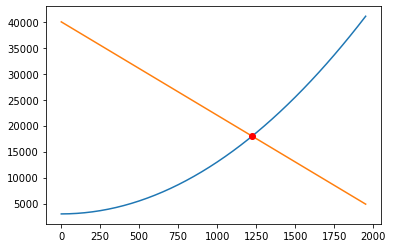

In [2]:
def supply(x):
    supply1= 0.01*x**2+3000
    return supply1

def demand(x):
    demand1=40000-18*x
    return demand1

x = np.arange(1, 2000, 50)

# fsolve må ha startargument (verdi). x0 betyr: let etter intersection for x>0. 
def intersection(supply, demand, x0):
    return fsolve(lambda x: supply(x) - demand(x), x0)

result = intersection(supply, demand, 1000.0)
pylab.plot(x, np.array(supply(x)), x, np.array(demand(x)), result, supply(result), 'ro')
pylab.show()




In [3]:
print(result)

print(supply(result))
print(demand(result))

[1223.67605816]
[17973.83095313]
[17973.83095313]


b) Vis at disse er henholdvis fallende og stigende, ved bruk av
- Regning
- figurativt (matplotlib) 
Husk å markere aksene tydelig og at funskjonene er definert slik at linjene krysser

In [4]:
# Ved regning: ta to kontrollverdier for x. For eksempel ved x = 500 og x = 1500.

# for etterspørsel
print(demand(500))
print(demand(1500))

# for tilbud
print(supply(500))
print(supply(1500))

#ser at de to første verdiene er synkende, og de to siste er stigende. 

31000
13000
5500.0
25500.0


c) Kommenter funksjonene og likevekten. Vis gjerne figurativt hvor likevekten er ved bruk av scatter

In [2]:
# Figuren er ment å representere leiemarkedet for boliger. 
# Vi ser at figuren går fra en verdi på 0 kroner til 40 000 kroner på y-aksen.
# På dette tenkte markedet tilbys det maks 2000 boliger.
# Videre forutsetter vi at alle boligene er identiske, slik at de er sammenlignbare.
# Vi ser at etterspørselskurven synker lineært, mens tilbudskurven stiger eksponensielt. 

### Oppgave 3 (15 poeng)

SSB har omfattende data på befolkningsutvikling (https://www.ssb.no/statbank/table/05803/tableViewLayout1/). Disse dataene skal du bruke i de neste deloppgavene.

a) lag lister av følgende variabler: "Befolkning 1. januar", "Døde i alt", "Innflyttinger" og "Utflyttinger". Velg selv variabelnavn når du definerer dem i python. Første element i hver liste skal være variabelnavnet. Bruk tall for perioden 2012-2021. Lag så en liste av disse listene. Du kan kalle den "ssb". 
<br><br>
<b>Hint:</b> når du skal velge variabler på SSB sin nettside må du holde inne ctrl for å velge flere variabler.


In [33]:
befolkning = pd.read_csv('befolkning3.csv', sep=';', decimal=',', encoding = "ISO-8859-1")
befolkning = befolkning.drop([0, 3, 4, 5])

døde = pd.read_json('https://data.ssb.no/api/v0/no/table/05803/')

døde

,title,variables
0,05803: Endringer i befolkningen i løpet av åre...,"{'code': 'ContentsCode', 'text': 'statistikkva..."
1,05803: Endringer i befolkningen i løpet av åre...,"{'code': 'Tid', 'text': 'år', 'values': ['1735..."


In [32]:
#%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 515.5 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


b) konverter "ssb" til en numpy matrise og gi den et nytt navn

c) Putt alle tallene inn i en egen matrise og konverter disse til int 

d) vis befolkningsutviklingen grafisk for de gjeldene årene ved bruk av matplotlib, og mer spesifikt "fig, ax = plt.subplots()". Vis befolkning på y-aksen i millioner

e) Lag det samme plottet ved bruk av oppslag. Hva er fordelen med dette?

In [ ]:
#to oppslag


f) Hva er den relative befolkningstilveksten utenom fødsler (dvs. innvandring/utvandring)? Definer en ny array og legg den til i oppslaget du laget i oppgaven tidligere. Kall den "rel_immigration". Plot denne sammen med grafen du laget i (d). 

In [ ]:

#spør miriam

g) ekstrapoeng. Kan plotte de samme tallene (dvs "rel_immigration" og "befolkning" sammen med år) i to figurer ved siden av hverandre ved bruk av "fig, (ax1, ax2) = plt.subplots(1, 2)". Gi grafene ulik farge


In [ ]:
easy


## Oppgave 4 (20 poeng)

Et lån består som regel av et månedlig terminbeløp. Dette beløpet er summen av avdrag (nedbetalingen på lånet) og renter. Vi antar månedlig forrenting i alle oppgavene. Dvs. at det er 12 terminer i hvert år.<br><br>
a) Lag en funksjon som regner ut hvor mye lånet "x" koster deg i renteutgifter for "t" terminer med årlig rente "r" for et serielån. <br> <br>  Siden dette er et serielån, så vil avdragene være like hver måned men renteutgiftene reduseres i takt med avdragene. Renteutgiftene for en gitt termin "t" vil derfor være den årlige renten "r" (delt på antall forrentinger "f") på gjenværende beløp på det tidspunktet.   $renteutgifter_{t} = (x-a*t)*{r/f}$   <br>  <br> 
Siden vi er ute etter den totale kostnaden i svaret, må du summere renteutgiftene over alle terminer, det vil si $\sum_{t=1}^N(x-a*t)*{r/f}$


<br>
<b>Hint:</b> siden terminbeløpet varierer for hver måned (pga at rentene endres), må alle enkeltperioder summeres. Det kan være nyttige å bruke funksjonen np.arange() til dette.


In [58]:
def seriel(x, t, r):
    a = x/t
    #cost = (x-a*t)*r/f
    cost = 0.0
    for t in range (1,t+1):
        cost = cost + (x-a*t)*r/12
    return cost
    
    
seriel(1000000,120,0.03)

# cost - lager ny variabel som du kan arbeide med (og endre på)
# cost = cost + funksjon - looper funksjonen for hver termin og summerer sammen

148750.0

b) regn ut hvor mye lånet koster deg med henholdsvis 10, 20 og 30 års tilbakebetaling. Anta 1 000 000 kr lånebeløp med 3% rente

In [59]:
print(seriel(1000000,120,0.03))
print(seriel(1000000,240,0.03))
print(seriel(1000000,360,0.03))


148750.0
298750.0
448750.0


c) Vis hva det samme lånet koster som annuitetslån, dvs differansen mellom alle terminbeløp og lånebeløp.<br> <br> Annuitetslån gir like terminbeløp hver måned, men renten utgjør en større del av dette beløpet i starten. Terminbeløpet for et annuitetslån er definert ved formelen:
$T = x*\frac{r/f} {(1-(1+(r/f))^{-t})}$, hvor x=lånebeløp, r = årlig rente, t = terminer, f= antall forrentinger





In [16]:
def ann(x, r, t):
    cost = 0.0
    f=t
    for t in range (1,t+1):
        cost = cost + x*(r/f)/(1*(1+(r/f))**-t)
    return cost

ann(1000000,0.03,240)


30456.40858932168

c) Vis hvordan utviklingen i rentekostnader og avdrag på terminer for serielån grafisk ved hjelp av stackplot funksjonen i matplotlib. Anta et bankinnskudd x = 1 000 000 kr, årlig rente r=3% og antall terminer t = 240 (det vil si 2 år). Siden vi må vise utviklingen per termin, husk at "t" også definerer hvilken måned vi er i. Dvs, hvis t=15, har det gått 1 år og 3 mnd med terminer. Se forøvrig relevante formler i oppgave (a) 

<br> 

<b>Hint1:</b> Siden avdragene er like for alle måneder, kan det være lurt å definere det månedlige avdraget som en liste og gange det med antall perioder. </br>
<b>Hint2:</b> Siden vi er ute etter både rentekostnader og avdrag hver for seg, kan det være lurt å definere en funksjon for hver av dem. </br>


In [ ]:


def renter(x, t, r):
    cost = 0.0
    for t in range (1,t+1):
        cost = cost + 